In [0]:
from keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test,y_test) = load_data()

In [17]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


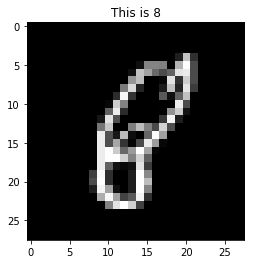

In [18]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 59999)
plt.title("This is " + str(y_train[c]))
plt.imshow(x_train[c], cmap="gray")

In [19]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,195,48,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,132,132,128,0,180,254,75,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,16,194,161,105,75,98,227,235,75,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,150,190,0,0,7,226,50,207,75,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,123,218,36,0,0,27,194,35,230,61,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,45,245,52,0,0,0,90,16,97,193,0,0,0,0,0,0,0


In [20]:
from keras.models import Sequential
# 全連結層: Fully-Connected, Dense
from keras.layers import Dense
mlp = Sequential()
# 784 * 256(原本) + 256(bias) = 200960
mlp.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10(原本) + 10(bias) = 2570
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [0]:
# loss: 我們用什麼方式來算跟正確答案的距離
# 機率: 一個輸出(binary_crossentropy) 多個輸出(categorical_crossentropy)
# optimizer: 調整的時候如何可以調得更好
# adam包含兩種: 1)動量優化: 速度累積 + 摩擦力  2)步長優化: 一開始大步, 後來小步
# metrics: 你除了loss以外還要看到什麼衡量標準
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [0]:
# 資料預處理
# 圖片: 1) 必須先拉成1D(reshape)   
# 假設一個輸入區間 -> 根據區間隨機一開始的參數
# tensorflow喜好區間: -1~1   0~1
# 基礎: 0-255 -> 0-1
x_train_norm = x_train.reshape(60000, 784) / 255
x_test_norm = x_test.reshape(10000, 784) / 255
# x_test_norm[0]

In [23]:
# 答案: 2 -> 十個機率 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# One-Hot Encoding
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# show一筆給你看
print("原本:", y_train[0])
print("轉換:", y_train_cat[0])

原本: 5
轉換: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
# batch_size: 看多少筆資料再作一次參數調整(負梯度)
# 建議: 圖片小(100-200) 圖片大(10-20)
# epochs: 整份資料要翻幾遍 1遍:60000筆 2遍: 60000 * 2
# 注意: epochs你可以控制模型什麼時候要停止訓練的關鍵
# validation_split: 把一些訓練資料直接拿來做考試
# loss: 高 -> 穩定 -> 高(過擬合), 穩定的epochs就把模型訓練停下來
# verbose(不重要): 0:完全無log 1:最完整 2:必要的就好
mlp.fit(x_train_norm, y_train_cat,
        batch_size=200, epochs=13,
        validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/13
 - 2s - loss: 0.3837 - acc: 0.8949 - val_loss: 0.1617 - val_acc: 0.9582
Epoch 2/13
 - 2s - loss: 0.1693 - acc: 0.9520 - val_loss: 0.1191 - val_acc: 0.9667
Epoch 3/13
 - 2s - loss: 0.1178 - acc: 0.9660 - val_loss: 0.0973 - val_acc: 0.9730
Epoch 4/13
 - 2s - loss: 0.0889 - acc: 0.9750 - val_loss: 0.0859 - val_acc: 0.9758
Epoch 5/13
 - 2s - loss: 0.0695 - acc: 0.9803 - val_loss: 0.0765 - val_acc: 0.9792
Epoch 6/13
 - 2s - loss: 0.0554 - acc: 0.9845 - val_loss: 0.0723 - val_acc: 0.9790
Epoch 7/13
 - 2s - loss: 0.0454 - acc: 0.9875 - val_loss: 0.0744 - val_acc: 0.9777
Epoch 8/13
 - 2s - loss: 0.0374 - acc: 0.9901 - val_loss: 0.0692 - val_acc: 0.9798
Epoch 9/13
 - 2s - loss: 0.0301 - acc: 0.9924 - val_loss: 0.0654 - val_acc: 0.9793
Epoch 10/13
 - 2s - loss: 0.0254 - acc: 0.9943 - val_loss: 0.0641 - val_acc: 0.9817
Epoch 11/13
 - 2s - loss: 0.0211 - acc: 0.9951 - val_loss: 0.0703 - val_acc: 0.9798
Epoch 12/13
 - 2s - loss: 0.0177 - a

In [25]:
mlp.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 37us/step


[0.0710819121546112, 0.9786]

In [28]:
# predict(sklearn:predict_proba)->機率
# predict_classes(sklearn:predict)->最高機率的值
pre = mlp.predict_classes(x_test_norm)
pre

array([7, 2, 1, ..., 4, 5, 6])

In [31]:
from sklearn.metrics import confusion_matrix
import pandas as pd
base = list(range(10))
row = [str(b) + "(正確)" for b in base]
col = [str(b) + "(預測)" for b in base]
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat, columns=col, index=row)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),971,0,0,2,1,1,2,1,2,0
1(正確),0,1122,3,1,0,1,2,3,3,0
2(正確),5,0,1007,1,1,0,2,5,11,0
3(正確),0,0,5,991,0,4,0,3,3,4
4(正確),1,0,4,1,953,0,5,4,1,13
5(正確),2,0,0,9,1,870,5,0,3,2
6(正確),7,2,0,1,2,5,940,0,1,0
7(正確),1,2,10,2,0,0,0,1003,4,6
8(正確),4,0,5,7,1,3,2,4,944,4
9(正確),3,2,0,5,4,2,1,5,2,985


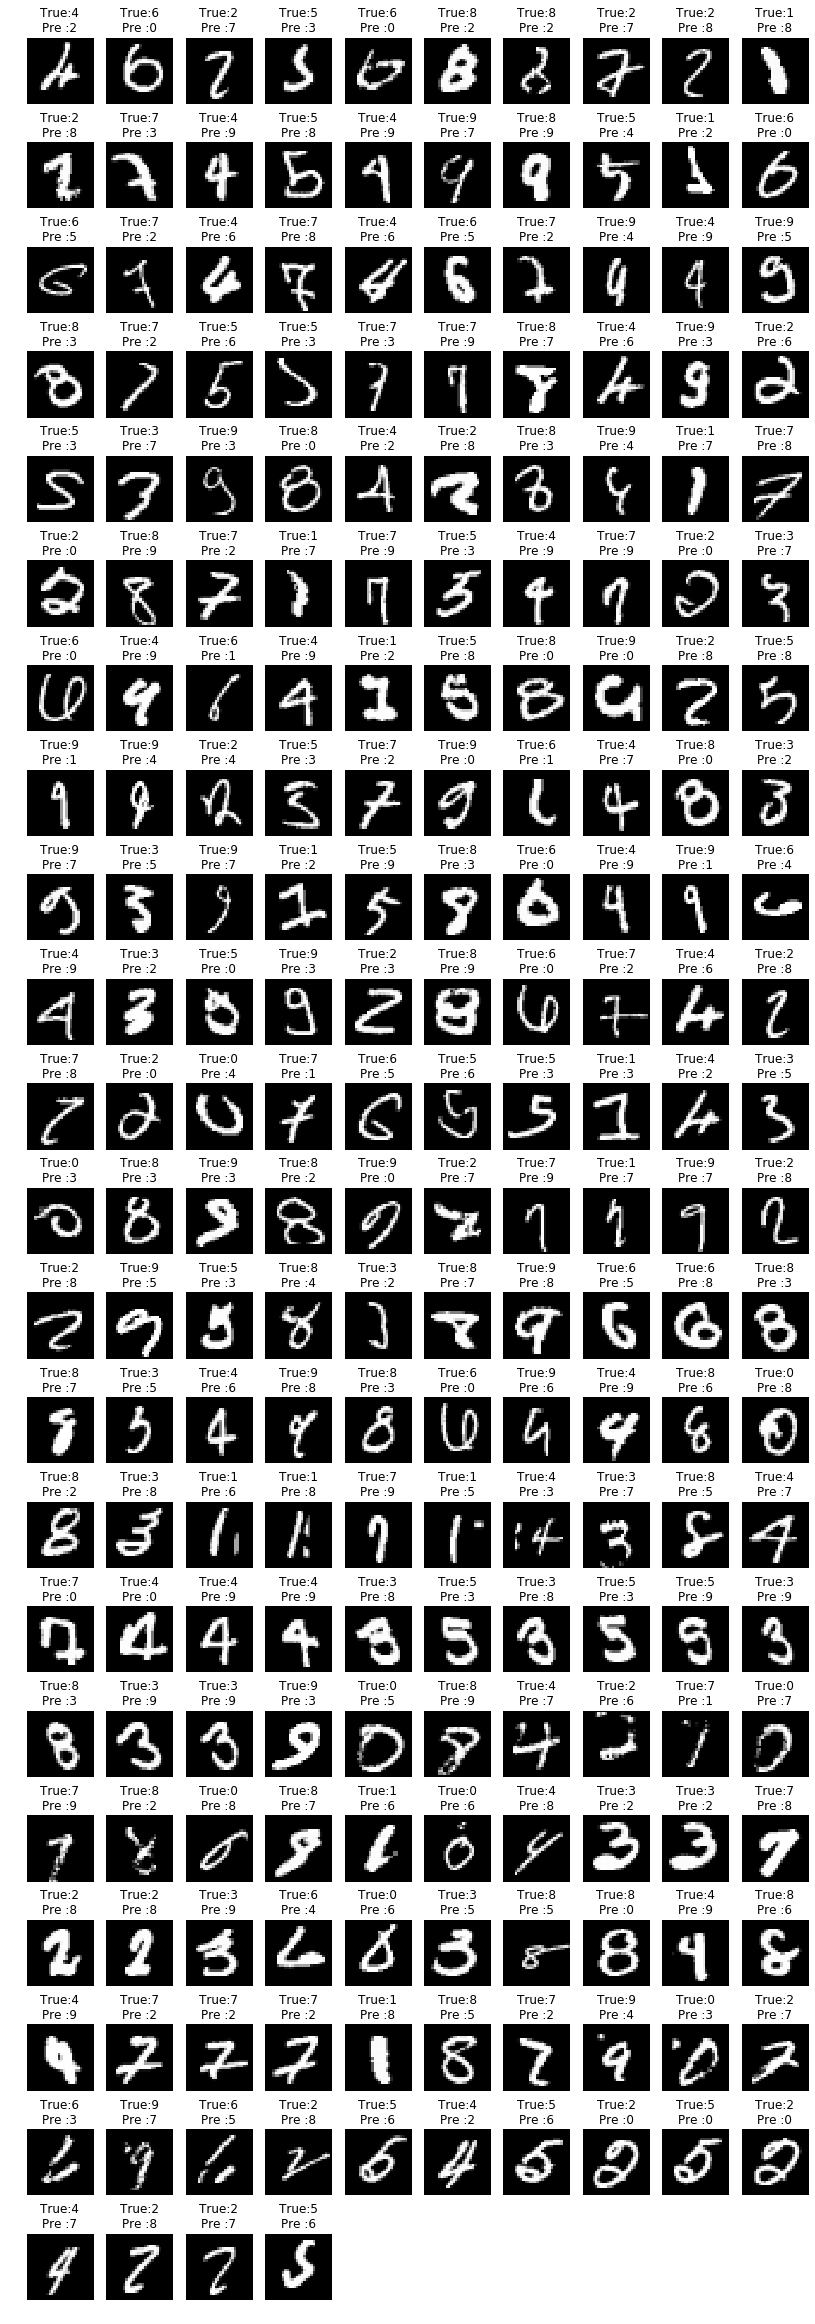

In [46]:
import numpy as np
idx = np.nonzero(y_test != pre)[0]
# 預測錯誤的圖片
false_img = x_test[idx]
# 預測錯誤的正確標籤
false_true = y_test[idx]
# 預測錯誤的預測標籤
false_pre = pre[idx]
# subplot: plt.subplot(高, 寬, 第幾張)
# (2, 3, 1), (2, 3, 2), (2, 3, 3)
# (2, 3, 4), (2, 3, 5), (2, 3, 6)
plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i + 1)
    t = ("True:" + str(false_true[i]) + "\n"
         "Pre :" + str(false_pre[i]))
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

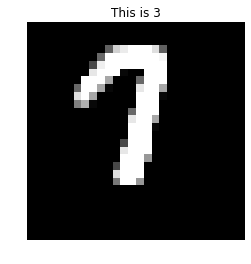

In [57]:
#@title 數字判斷APP
# Pillow(PIL)
from keras.preprocessing.image import load_img
file_name = "test2.png" #@param {type:"string"}
img = load_img(file_name, target_size=(28, 28)).convert("L")
img = np.array(img)
# (1, 784) -> 2D 一筆 784個值 (784) -> 1D
img_norm = img.reshape(1, 784) / 255
pre = mlp.predict_classes(img_norm)
plt.title("This is " + str(pre[0]))
plt.axis("off")
plt.imshow(img, cmap="gray")